Saving ForestFire.xlsx to ForestFire (9).xlsx
Data before Scaling
      Bejaia Region Dataset   Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                        32           4           2          19           0   
1                         0           0           0           6          30   
2                        11           0           0           6          34   
3                        22           0           0           3          55   
4                        25           0           0           2          61   
..                      ...         ...         ...         ...         ...   
243                      18           3           0           7          38   
244                      19           3           0           5          59   
245                      20           3           0           4          59   
246                      21           3           0           1          27   
247                      23           3           0           1 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


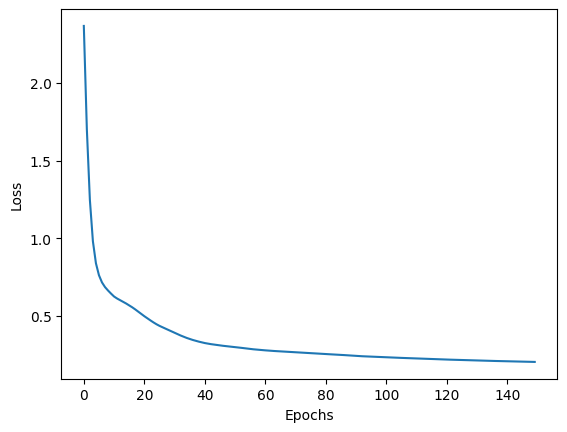

In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = next(iter(uploaded))
data = pd.read_excel(io.BytesIO(uploaded[filename]))
data.rename(columns={data.columns[-1]: 'Fire'}, inplace=True)
if data['Fire'].dtype == 'object':
    data['Fire'] = LabelEncoder().fit_transform(data['Fire'])
for col in data.columns:
    if col != 'Fire' and data[col].dtype == 'object':
        data[col] = data[col].astype(str)
        data[col] = LabelEncoder().fit_transform(data[col])
print("Data before Scaling\n", data)
inplist = data.columns[:-1]
scale = StandardScaler()
data[inplist] = scale.fit_transform(data[inplist])
print("Data after Scaling\n", data)
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)
clf = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic', max_iter=150, solver='adam', learning_rate='constant', learning_rate_init=0.19)
clf.fit(x_train, y_train)
ypred = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print("Confusion Matrix\n", cm)
print("Classification Report\n", classification_report(y_test, ypred))
print("Coefficients\n", clf.coefs_)
print("Intercepts\n", clf.intercepts_)
loss_values = clf.loss_curve_
plt.plot(loss_values)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
